# Imports

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import biosppy.signals.ecg as ecg
from sklearn.preprocessing import normalize
import cv2
import os

In [74]:
sampling_rate=300

In [75]:
x_train = pd.read_csv('../data/X_train.csv', nrows=1000).drop('id', axis=1)

In [76]:
y_train = pd.read_csv('../data/y_train.csv').drop('id', axis=1)

In [77]:
y_train.y.value_counts()

0    3030
2    1474
1     443
3     170
Name: y, dtype: int64

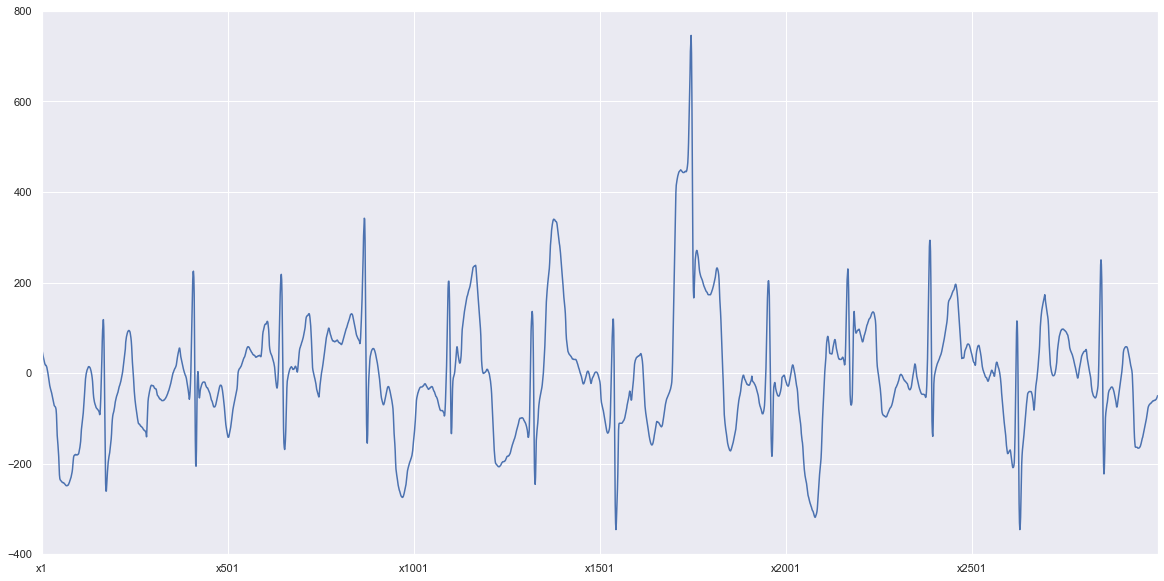

In [78]:
plt.figure(figsize=(20,10))
x_train.iloc[1][1:3000].plot()

## Split into heartbeats

In [79]:
signal = x_train.iloc[0].values

In [80]:
r_peaks = ecg.christov_segmenter(signal=signal, sampling_rate=sampling_rate)

/Users/elrich/opt/anaconda3/lib/python3.7/site-packages/biosppy/signals/ecg.py:582: RuntimeWarning: invalid value encountered in less
  Y[Y < 0] = 0


In [81]:
r_peaks[0]

array([], dtype=int64)

In [82]:
beats = ecg.extract_heartbeats(signal=signal,rpeaks=r_peaks[0],sampling_rate=sampling_rate)

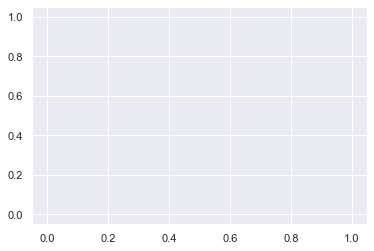

In [84]:
plt.plot(beats[0])

In [85]:
def get_heartbeats(data):
    signal = data[~np.isnan(data)]
    rpeaks = ecg.christov_segmenter(signal=signal, sampling_rate=sampling_rate)
    beats = ecg.extract_heartbeats(signal=signal,rpeaks=rpeaks[0],sampling_rate=sampling_rate)
    return beats[0]

In [86]:
beats = get_heartbeats(x_train.iloc[0].values)

In [87]:
beats

array([[-37., -36., -35., ..., -36., -39., -45.],
       [ -4.,  -7.,  -6., ..., -88., -88., -89.],
       [ 16.,  21.,  26., ..., -40., -39., -37.],
       ...,
       [-39., -36., -33., ..., -44., -44., -45.],
       [-58., -57., -57., ..., -21., -20., -19.],
       [-19., -16., -13., ..., -71., -70., -68.]])

True

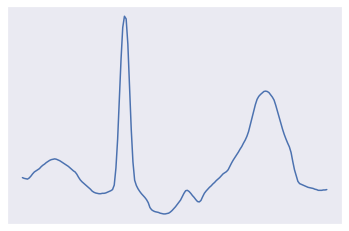

In [105]:
fig = plt.figure()
plt.plot(beats[10]) 
plt.xticks([]), plt.yticks([])
filename = './images/test.png'
fig.savefig(filename,bbox_inches = 'tight',pad_inches=0)
im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
im_gray = cv2.resize(im_gray, (128, 128), interpolation = cv2.INTER_LANCZOS4)
cv2.imwrite('2.png', im_gray)
# plt.imshow(im_gray)

In [89]:
"""
Extracts heartbeats from one row of the input data
"""
def get_heartbeats(data):
    signal = data[~np.isnan(data)]
    rpeaks = ecg.christov_segmenter(signal=signal, sampling_rate=sampling_rate)
    beats = ecg.extract_heartbeats(signal=signal,rpeaks=rpeaks[0],sampling_rate=sampling_rate)
    return beats[0]

"""
Creates 128x128 image for an individual beat.
Stores it as e.g. './images/class_0/1.png'
"""
def create_image_for_beat(beat, cat, count):
    filename = './images/class_{}/{}.png'.format(cat, count)
    fig = plt.figure()
    plt.plot(beat) 
    plt.xticks([]), plt.yticks([])
    fig.savefig('tmp.png',bbox_inches = 'tight',pad_inches=0)
    plt.close(fig)
    im_gray = cv2.imread('tmp.png', cv2.IMREAD_GRAYSCALE)
    im_gray = cv2.resize(im_gray, (128, 128), interpolation = cv2.INTER_LANCZOS4)
    if not cv2.imwrite(filename, im_gray):
        raise Exception("Could not write image")

"""
Creates 128x128 images for each beat in one row of the input data.
"""
def create_images_for_signal(signal, cat, counts):
    beats = get_heartbeats(signal)
    for beat in beats:
        create_image_for_beat(beat, cat, counts[cat])
        counts[cat] += 1
    return len(beats)

In [90]:
counts = [0,0,0,0]
y_data = pd.read_csv('../data/y_train.csv').drop('id', axis=1)
chunksize = 1000
chunknum = 0
"""
Read in 1000 rows at a time and create images for each beat
"""
for chunk in pd.read_csv('../data/x_train.csv', chunksize=chunksize):
    print('\nProcessing chunk {}\n'.format(chunknum))
    x_data = chunk.drop('id', axis=1)
    for i, row in enumerate(x_train.values):
        cat = y_train.y[i]
        count = create_images_for_signal(row, cat, counts)
        print('created {} images for row {} of chunk {}'.format(count, i, chunknum))
    chunknum += 1

KeyboardInterrupt: 

In [97]:
a = x_train.iloc[0].values

In [112]:
print('start')
beats = get_heartbeats(a)
print('beats')
plt.ioff()
for i, beat in enumerate(beats):
    print(i)
    filename = './testing/class_{}/{}.png'.format(cat, count)
    fig = plt.figure()
    plt.plot(beat) 
    plt.xticks([]), plt.yticks([])
    fig.savefig('tmp.png',bbox_inches = 'tight',pad_inches=0)
    plt.close(fig)
    im_gray = cv2.imread('tmp.png', cv2.IMREAD_GRAYSCALE)
    im_gray = cv2.resize(im_gray, (128, 128), interpolation = cv2.INTER_LANCZOS4)
    if not cv2.imwrite(filename, im_gray):
        raise Exception("Could not write image")


start
beats
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


In [114]:
print(1)

1


In [115]:
a

array([215., 210., 200., ...,  nan,  nan,  nan])

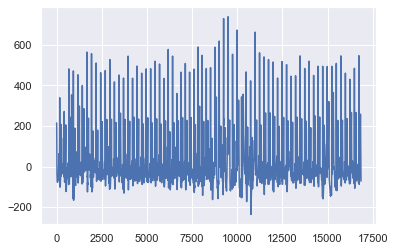

In [116]:
plt.plot(a)

In [124]:
beat = beats[0]
beat

array([-37., -36., -35., -34., -32., -29., -26., -22., -18., -15., -11.,
        -8.,  -6.,  -3.,  -1.,   1.,   4.,   8.,  12.,  16.,  18.,  18.,
        15.,   8.,   0.,  -7., -15., -23., -32., -40., -46., -49., -51.,
       -52., -53., -54., -56., -58., -60., -61., -62., -63., -64., -66.,
       -69., -72., -75., -77., -80., -86., -89., -83., -70., -51., -21.,
        34., 112., 227., 360., 450., 481., 452., 362., 228., 108.,  25.,
        -1.,  -8., -12., -14., -17., -21., -28., -35., -42., -50., -57.,
       -67., -76., -80., -81., -82., -82., -82., -82., -82., -83., -84.,
       -84., -83., -79., -74., -70., -66., -62., -59., -55., -51., -47.,
       -43., -41., -39., -37., -36., -34., -33., -32., -30., -29., -26.,
       -23., -20., -16., -13.,  -9.,  -6.,  -4.,   0.,   2.,   6.,  12.,
        23.,  35.,  48.,  59.,  68.,  76.,  85.,  94., 102., 109., 115.,
       122., 129., 135., 142., 150., 162., 180., 192., 204., 215., 225.,
       233., 239., 242., 242., 235., 225., 208., 18

In [126]:
np.max(beat)

481.0

In [125]:
np.min(beat)

-89.0

In [130]:
beat2 = beat + abs(np.min(beat))

In [146]:
np.max(beat2)

570.0

In [148]:
len(beat2)

180

In [171]:
vals = np.array(beat)
mat = np.full((len(beat2),int(np.max(beat2)+1)), 255, dtype='uint8')
mat[np.arange(len(beat2)), np.array(beat2).astype(int)] = 0

In [172]:
mat.shape

(180, 571)

In [175]:
im_gray = cv2.resize(mat, (128, 128), interpolation = cv2.INTER_LANCZOS4)
cv2.imwrite('test.png', im_gray)
cv2.imwrite('test2.png', mat)

True

In [174]:
mat

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)